# Bird_Monitoring_Data_GRASSLAND


In [12]:
import pandas as pd 
import numpy as np

# file path
path2='Bird_Monitoring_Data_GRASSLAND.xlsx'

#read the excel file
excel_file2=pd.ExcelFile(path2)

#get all the sheets
sheet_name2=excel_file2.sheet_names

#read data from all sheets into dictionary
sheet_dict2={sheet:excel_file2.parse(sheet) for sheet in sheet_name2}

#convert all data frame into single file
combined_df2=pd.concat(
    [df.assign(sheet=sheet_name)for sheet_name,df in sheet_dict2.items()],
    ignore_index=True
)
df2=combined_df2.drop(columns=['sheet'])
#calculate the missing values
missing_values2=df2.isnull().sum()

# calculste the missing values in percentage
missing_percentage2=(df2.isnull().sum() / len (df2)*100)

print('missing data:\n',missing_values2)
print('missing_percentage:\n',missing_percentage2)


missing data:
 Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Ob

C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\2755589000.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df2=pd.concat(


In [13]:
#check the categorical data
cat_data2=[col for col in df2.columns if df2[col].dtype=='object']
print('categorical data:\n',cat_data2)

#check the numerical data
num_data2=[col for col in df2.columns if df2[col].dtype!='object']
print('numerical data:\n',num_data2)


categorical data:
 ['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs', 'Initial_Three_Min_Cnt']
numerical data:
 ['Date', 'AcceptedTSN', 'TaxonCode', 'Temperature', 'Humidity']


In [14]:
# drop the sub unit code column because it have 100% null values
df2.drop(columns=['Sub_Unit_Code'],inplace=True)

In [15]:
#check the duplicate
duplicates=df2.duplicated().sum()
print(duplicates)

1705


In [16]:
# using drop_duplicate function to remove the duplicate data
duplicates_drop=df2.drop_duplicates(inplace=True)
print(duplicates_drop)

None


In [17]:
duplicates_drop_check=df2.duplicated().sum()
print(duplicates_drop_check)

0


# Impute the missing data

In [18]:
#impute the data for missing values using mode for the categorical data
method=df2['ID_Method'].mode()[0]
df2['ID_Method']=df2['ID_Method'].fillna(method)

Distance=df2['Distance'].mode()[0]
df2['Distance']=df2['Distance'].fillna(Distance)

#using mean for the numerical data
Accepted=df2['AcceptedTSN'].mean()
df2['AcceptedTSN']=df2['AcceptedTSN'].fillna(Accepted)

TaxonCode=df2['TaxonCode'].mean()
df2['TaxonCode']=df2['TaxonCode'].fillna(TaxonCode)

print(method)
print(Distance)
print(Accepted)
print(TaxonCode)

Singing
50 - 100 Meters
202493.54370500954
105706.43771981243


In [19]:
# create a dataframe
G1=pd.DataFrame(df2)

In [20]:
# convert dataframe into  csv file
G1.to_csv('Grassland.csv',index=False)

In [21]:
print(G1)

     Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
0               ANTI  ANTI-0054     Grassland  2018 2018-05-22   05:35:00   
1               ANTI  ANTI-0054     Grassland  2018 2018-05-22   05:35:00   
2               ANTI  ANTI-0054     Grassland  2018 2018-05-22   05:35:00   
3               ANTI  ANTI-0054     Grassland  2018 2018-05-22   05:35:00   
4               ANTI  ANTI-0054     Grassland  2018 2018-05-22   05:35:00   
...              ...        ...           ...   ...        ...        ...   
8514            MONO  MONO-0089     Grassland  2018 2018-05-10   06:35:00   
8515            MONO  MONO-0089     Grassland  2018 2018-05-10   06:35:00   
8516            MONO  MONO-0089     Grassland  2018 2018-05-10   06:35:00   
8517            MONO  MONO-0089     Grassland  2018 2018-05-10   06:35:00   
8521            MONO  MONO-0089     Grassland  2018 2018-05-10   06:35:00   

      End_Time          Observer Visit Interval_Length  ... AOU_Code  \
0  

In [22]:
G1.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
dtype: int64

In [23]:
# using describe to check the summary stats
G1.describe()

,Date,AcceptedTSN,TaxonCode,Temperature,Humidity
count,6826,6826.000000,6826.000000,6826.000000,6826.000000
mean,2018-06-14 19:22:22.748315392,202493.543705,105706.437720,23.272956,69.655098
min,2018-05-07 00:00:00,174773.000000,76625.000000,11.000000,7.300000
25%,2018-05-23 00:00:00,178775.000000,84865.000000,20.200001,62.200001
50%,2018-06-19 00:00:00,179150.000000,88296.000000,22.799999,70.099998
75%,2018-07-11 00:00:00,179443.000000,94215.000000,26.400000,80.300003
max,2018-07-19 00:00:00,950061.000000,926917.000000,37.299999,98.800003
std,NaN,104527.729487,90311.129394,4.669413,13.740033


In [24]:
#check the summary stats by index
G1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,6826,2018-06-14 19:22:22.748315392,2018-05-07 00:00:00,2018-05-23 00:00:00,2018-06-19 00:00:00,2018-07-11 00:00:00,2018-07-19 00:00:00,NaN
AcceptedTSN,6826.0,202493.543705,174773.0,178775.0,179150.0,179443.0,950061.0,104527.729487
TaxonCode,6826.0,105706.43772,76625.0,84865.0,88296.0,94215.0,926917.0,90311.129394
Temperature,6826.0,23.272956,11.0,20.200001,22.799999,26.4,37.299999,4.669413
Humidity,6826.0,69.655098,7.3,62.200001,70.099998,80.300003,98.800003,13.740033


In [25]:
#check the summary stats by index
G1.describe(include='object')

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,...,Common_Name,Scientific_Name,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
count,6826,6826,6826,6826,6826,6826,6826,6826,6826,6826,...,6826,6826,6826,6826,6826,6826,6826,6826,6826,6826
unique,4,201,1,1,273,276,3,3,4,3,...,107,107,107,2,2,5,4,4,1,2
top,ANTI,ANTI-0163,Grassland,2018,07:29:00,07:39:00,Elizabeth Oswald,1,0-2.5 min,Singing,...,Northern Cardinal,Cardinalis cardinalis,NOCA,False,False,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
freq,3130,54,6826,6826,74,74,2478,2474,3345,4192,...,530,530,530,6786,5381,3183,3534,3149,6826,3570


In [26]:
G1.head(100)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20.0,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20.0,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20.0,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,EABL,False,False,20.0,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,20.0,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,ANTI,ANTI-0053,Grassland,2018,2018-05-23,05:40:00,05:50:00,Elizabeth Oswald,1,0-2.5 min,...,EAWP,False,True,21.0,79.199997,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
106,ANTI,ANTI-0053,Grassland,2018,2018-05-23,05:40:00,05:50:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,21.0,79.199997,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
107,ANTI,ANTI-0053,Grassland,2018,2018-05-23,05:40:00,05:50:00,Elizabeth Oswald,1,7.5 - 10 min,...,COGR,False,False,21.0,79.199997,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
108,ANTI,ANTI-0053,Grassland,2018,2018-05-23,05:40:00,05:50:00,Elizabeth Oswald,1,5 - 7.5 min,...,EABL,False,False,21.0,79.199997,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False


In [27]:
G1.shape

(6826, 28)

# EDA

season
summer    4352
spring    2474
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\3987717282.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,palette=['red','blue'])


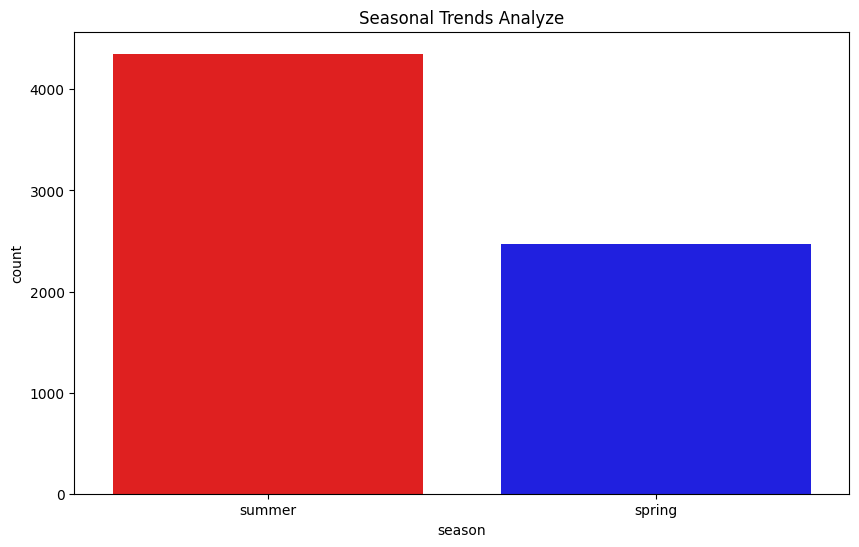

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

file='grassland.csv'
grass=pd.read_csv(file)

# Seasonal Trends Analyze
grass['Date']=pd.to_datetime(grass['Date'])
grass['Month']=grass['Date'].dt.month

def  land (season):
    if season in [12,1,2]:
     return 'winter'
    elif season in [3,4,5]:
       return 'spring'
    elif season in [6,7,8]:
       return 'summer'
    else:
        return 'fall'
    
grass['season']=grass['Month'].apply(land)
count=grass['season'].value_counts()
print(count)


plt.figure(figsize=(10,6))
sns.barplot(x=count.index,y=count.values,palette=['red','blue'])
plt.title('Seasonal Trends Analyze')
plt.xlabel('season')
plt.ylabel('count')
plt.show()


In [29]:
# Observation Time

grass['Start_Time']=pd.to_datetime(grass['Start_Time'],format='%H:%M:%S').dt.hour
grass['End_Time']=pd.to_datetime(grass['End_Time'],format='%H:%M:%S').dt.hour

grass_st=grass['Start_Time'].value_counts().sort_index()
grass_En=grass['End_Time'].value_counts().sort_index()

print(grass_st)
print(grass_En)



Start_Time
5      654
6     1548
7     1683
8     1276
9     1037
10     628
Name: count, dtype: int64
End_Time
5      375
6     1524
7     1719
8     1306
9     1124
10     778
Name: count, dtype: int64


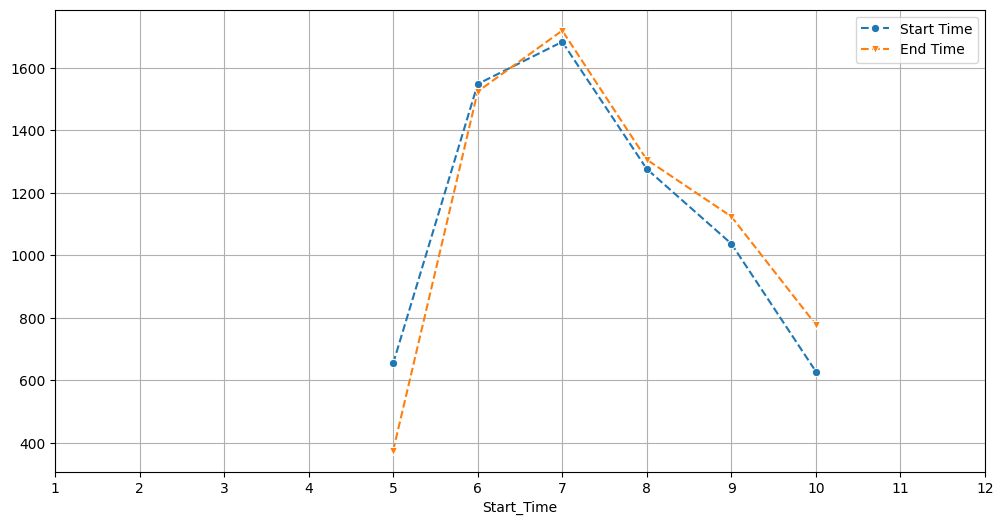

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x=grass_st.index,y=grass_st.values,marker='o',linestyle='--',label='Start Time')
sns.lineplot(x=grass_En.index,y=grass_En.values,marker='v',linestyle='--',label='End Time')
plt.legend()
plt.xticks(range(1,13))
plt.grid()
plt.show()


Plot_Name
ANTI-0163    54
ANTI-0028    52
HAFE-0067    52
MANA-0048    50
ANTI-0016    49
MONO-0037    48
ANTI-0184    48
ANTI-0034    48
ANTI-0161    48
MONO-0057    48
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\3286528308.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot.index,y=plot.values,palette='viridis')


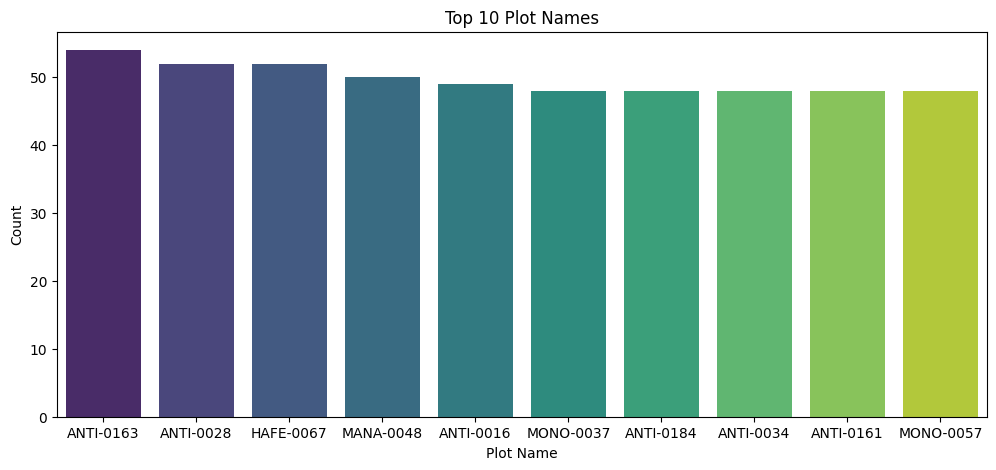

In [31]:
# Plot-Level Analysis

plot=grass['Plot_Name'].value_counts().nlargest(10)
print(plot)

plt.figure(figsize=(12,5))
sns.barplot(x=plot.index,y=plot.values,palette='viridis')
plt.xlabel("Plot Name")
plt.ylabel("Count")
plt.title("Top 10 Plot Names")
plt.show()


Interval_Length
0-2.5 min       3345
2.5 - 5 min     1427
5 - 7.5 min     1091
7.5 - 10 min     963
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\1005114901.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=act.index,y=act.values,palette='viridis')


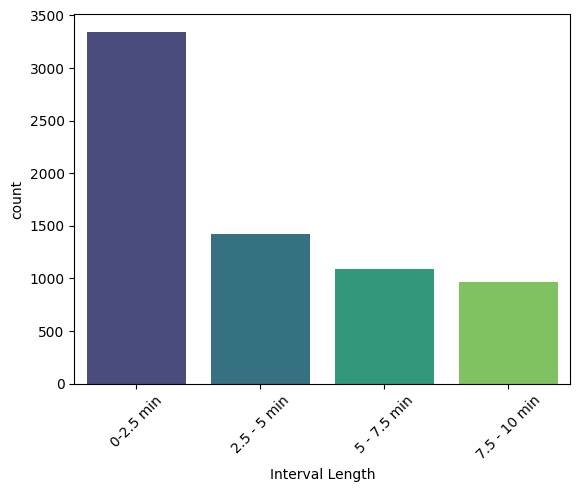

In [32]:
#Interval_Length 

act=grass['Interval_Length'].value_counts()
print(act)

plt.Figure(figsize=(10,6))
sns.barplot(x=act.index,y=act.values,palette='viridis')
plt.xlabel('Interval Length')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

ID_Method
Singing          4192
Visualization    1370
Calling          1264
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\732604672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ID.index,y=ID.values,palette='coolwarm')


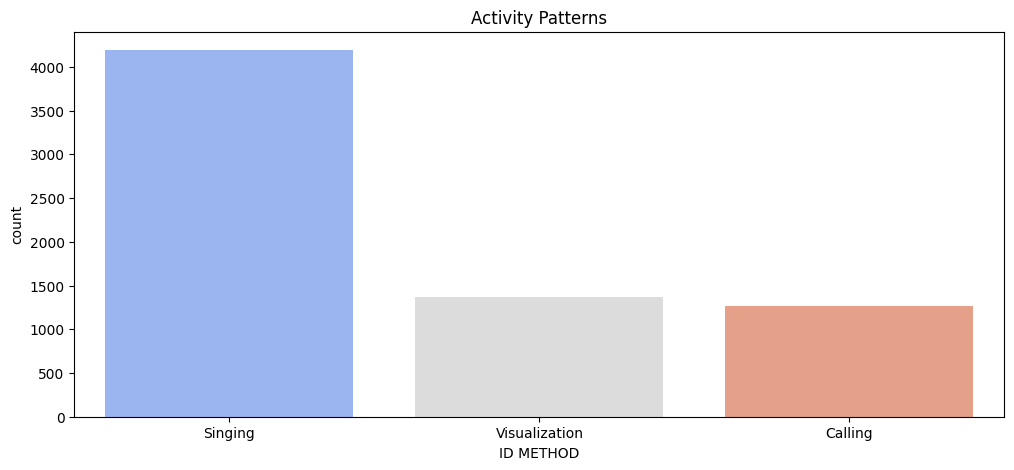

In [33]:
# ID_Method

ID=grass['ID_Method'].value_counts()
print(ID)

plt.figure(figsize=(12,5))
sns.barplot(x=ID.index,y=ID.values,palette='coolwarm')
plt.xlabel('ID METHOD')
plt.ylabel('count')
plt.title('Activity Patterns')
plt.show()

Sex
Undetermined    3650
Male            3050
Female           126
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\4046677071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex,palette='viridis')


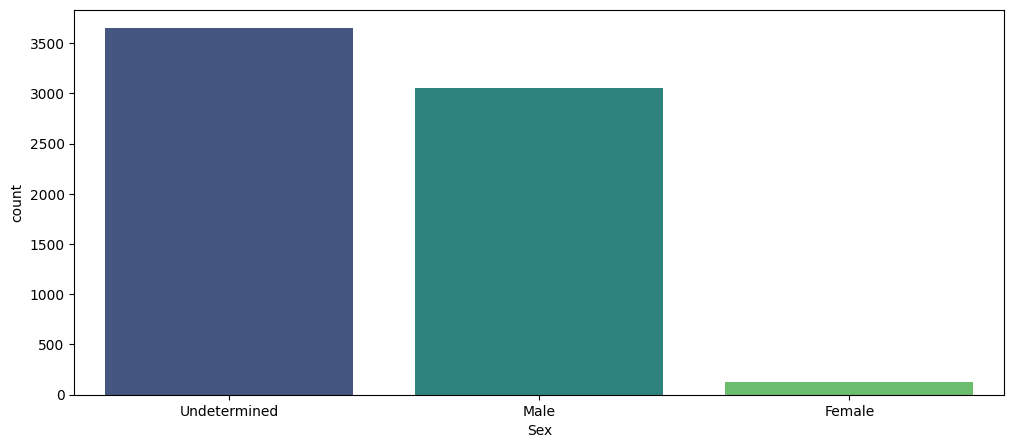

In [48]:
sex=grass['Sex'].value_counts()
print(sex)

plt.figure(figsize=(12,5))
sns.barplot(data=sex,palette='viridis')
plt.show()

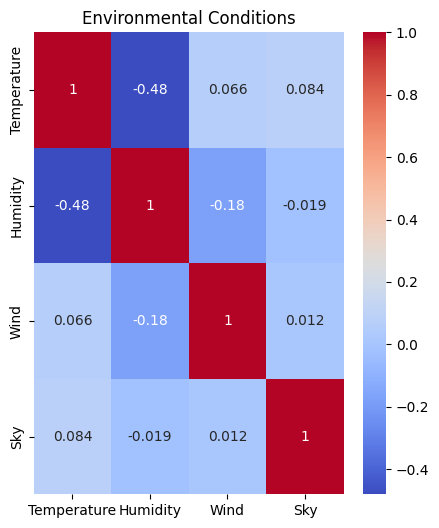

In [34]:
from sklearn.preprocessing import LabelEncoder

En_coder=LabelEncoder()
grass['Common_Name']=En_coder.fit_transform(grass['Common_Name'])
grass['Wind']=En_coder.fit_transform(grass['Wind'])
grass['Sky']=En_coder.fit_transform(grass['Sky'])


corr=grass[['Temperature','Humidity','Wind','Sky']].corr()

plt.figure(figsize=(5,6))
sns.heatmap(data=corr,annot=True,cmap='coolwarm')
plt.title('Environmental Conditions')
plt.show()

Disturbance
Slight effect on count      3149
No effect on count          2672
Moderate effect on count     766
Serious effect on count      239
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\1957853068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Dist,palette='viridis')


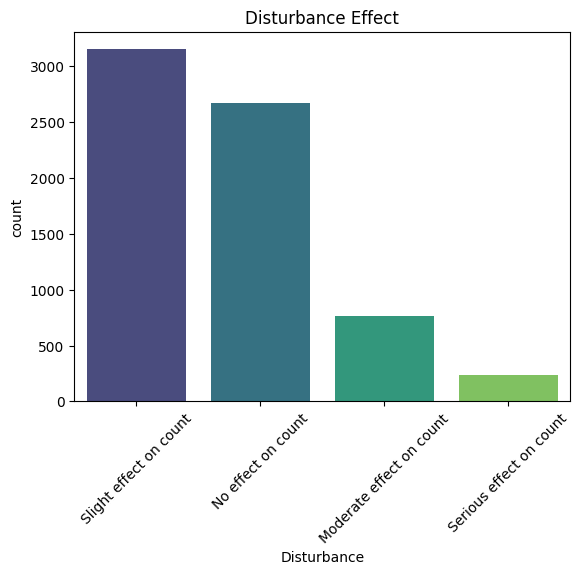

In [35]:
# Distribution
Dist=grass['Disturbance'].value_counts()
print(Dist)

plt.Figure(figsize=(10,8))
sns.barplot(data=Dist,palette='viridis')
plt.xticks(rotation=45)
plt.title('Disturbance Effect')
plt.show()

Distance
50 - 100 Meters    4227
<= 50 Meters       2599
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\4129401370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distance,palette='viridis')


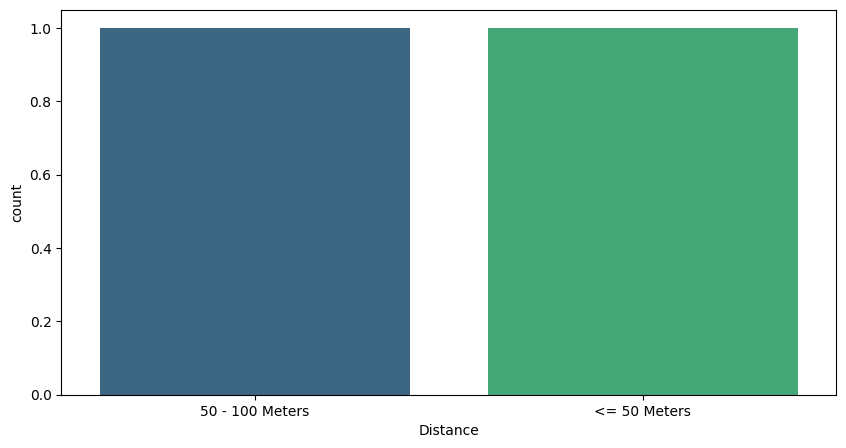

In [36]:
# Distance Analysis

Distance=grass['Distance'].value_counts()
print(Distance)

plt.figure(figsize=(10,5))
sns.countplot(data=Distance,palette='viridis')
plt.show()

Flyover_Observed
False    6229
True      597
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\1696435466.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Flyover_Observed,palette=['orange','pink'])


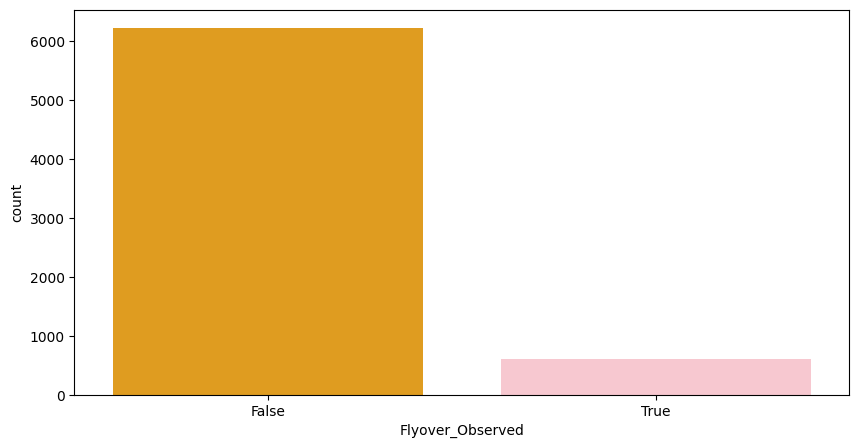

In [37]:
# Flyover_Observed

Flyover_Observed=grass['Flyover_Observed'].value_counts()
print(Flyover_Observed)

plt.figure(figsize=(10,5))
sns.barplot(data=Flyover_Observed,palette=['orange','pink'])
plt.show()

Observer
Elizabeth Oswald    2478
Kimberly Serno      2436
Brian Swimelar      1912
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\116079040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Observer,palette='viridis')


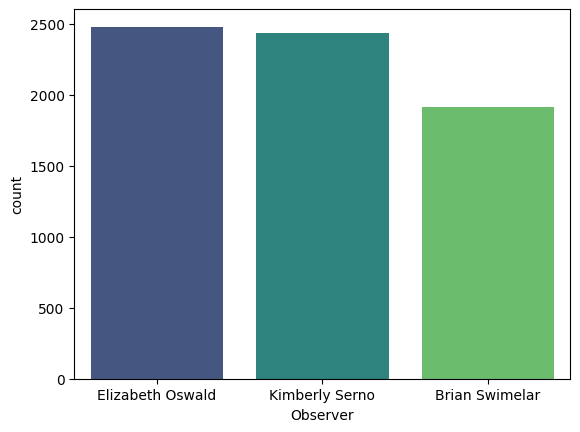

In [38]:
# Observer Bias

Observer=grass['Observer'].value_counts().nlargest(10)
print(Observer)

plt.Figure(figsize=(12,7))
sns.barplot(data=Observer,palette='viridis')
plt.show()


Visit
1    2474
2    2246
3    2106
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\1802867887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Visit,palette='viridis')


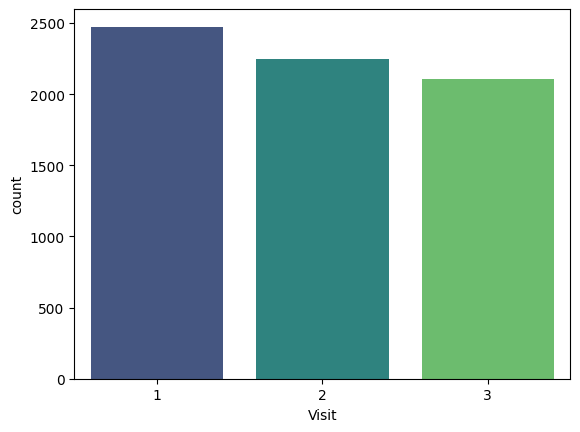

In [39]:
# Visit 

Visit=grass['Visit'].value_counts()
print(Visit)

plt.Figure(figsize=(10,7))
sns.barplot(data=Visit,palette='viridis')
plt.show()

PIF_Watchlist_Status
False    6786
True       40
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\969848443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=PIF,palette='viridis')


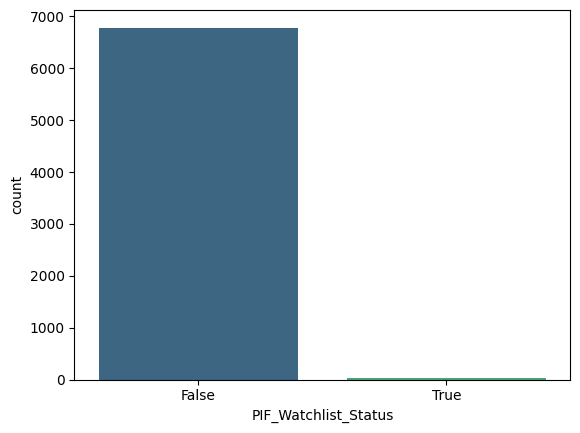

In [40]:
# PIF_Watchlist_Status 

PIF=grass['PIF_Watchlist_Status'].value_counts()
print(PIF)

plt.Figure(figsize=(10,7))
sns.barplot(data=PIF,palette='viridis')
plt.show()

Regional_Stewardship_Status
False    5381
True     1445
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\3203363927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Regional,palette='viridis')


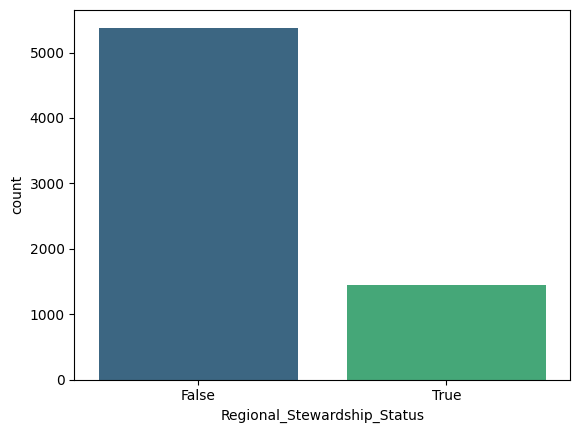

In [41]:
# Regional_Stewardship_Status

Regional=grass['Regional_Stewardship_Status'].value_counts()
print(Regional)

plt.Figure(figsize=(10,7))
sns.barplot(data=Regional,palette='viridis')
plt.show()

AOU_Code
NOCA    530
INBU    461
FISP    456
CHSP    353
CARW    347
GRSP    346
AMGO    310
RWBL    273
SOSP    222
MODO    197
BHCO    193
ETTI    179
AMRO    176
EAME    170
EABL    167
EATO    159
AMCR    137
BARS    130
NOMO    130
BLJA    119
COGR    107
COYE    101
BGGN     94
CACH     93
RBWO     91
EAWP     88
EUST     81
GRCA     73
GCFL     68
CEDW     62
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3036\1723846350.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=AOU.index,y=AOU.values,palette='viridis')


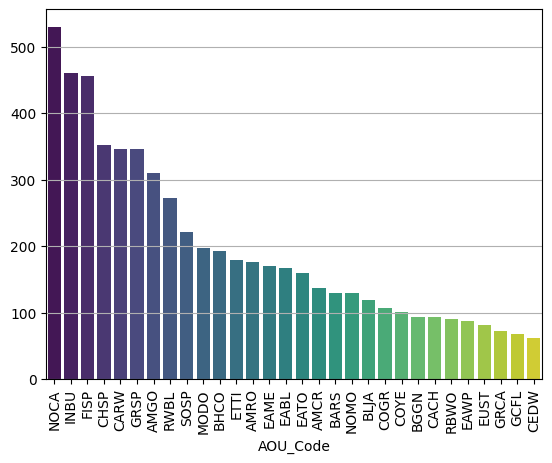

In [42]:
# AOU Code Patterns

AOU=grass['AOU_Code'].value_counts().nlargest(30)
print(AOU)

plt.Figure(figsize=(20,10))
sns.barplot(x=AOU.index,y=AOU.values,palette='viridis')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

#  SQL

In [1]:
#sql connection

import pandas as pd
import pymysql

conn=pymysql.connect(
host='localhost',
user='root',
password='Janakiramanjohn1330@',
database='birdforest'
)
mycursor=conn.cursor()


In [ ]:
conn # check the connection 

In [ ]:
g='Grassland.csv' #load dataset
df2=pd.read_csv(g)

In [ ]:
# writing query for creating a table
q1="""
   create table Grassland(
        Admin_Unit_Code VARCHAR(100),
        Plot_Name VARCHAR(100),
        Location_Type VARCHAR(100),
        Year INT,
        Date DATE,	
        Start_Time TIME,
        End_Time TIME,
        Observer VARCHAR(50),
        Visit INT,
        Interval_Length VARCHAR(50),
        ID_Method VARCHAR(100),
        Distance VARCHAR(100),
        Flyover_Observed VARCHAR(50),
        Sex VARCHAR(50),
        Common_Name VARCHAR(100),
        Scientific_Name VARCHAR(100),
        AcceptedTSN INT,
        AOU_Code VARCHAR(50),
        PIF_Watchlist_Status VARCHAR(50),
        Regional_Stewardship_Status BOOLEAN,
        Temperature FLOAT,
        Humidity FLOAT,
        Sky VARCHAR(50),
        Wind VARCHAR(50),
        Disturbance VARCHAR(100),
        Initial_Three_Min_Cnt VARCHAR(50)
)"""

mycursor.execute(q1)
conn.commit()

In [ ]:
#inserting the values into the table
insert = """
   INSERT INTO Grassland (
       Admin_Unit_Code, Plot_Name, Location_Type, Year, Date, Start_Time, End_Time,
       Observer, Visit, Interval_Length, ID_Method, Distance, Flyover_Observed,Sex,Common_Name,
       Scientific_Name, AcceptedTSN, AOU_Code, PIF_Watchlist_Status, 
       Regional_Stewardship_Status, Temperature, Humidity, Sky, Wind, Disturbance, 
       Initial_Three_Min_Cnt
   )
   VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
"""
 # using for loop to iterate the rows
for index, row in df2.iterrows():
    mycursor.execute(insert, (
        row['Admin_Unit_Code'],row['Plot_Name'], row['Location_Type'],
        row['Year'], row['Date'], row['Start_Time'], row['End_Time'], row['Observer'],
        row['Visit'], row['Interval_Length'], row['ID_Method'], row['Distance'],
        row['Flyover_Observed'],row['Sex'], row['Common_Name'], row['Scientific_Name'],
        row['AcceptedTSN'], row['AOU_Code'],  
        row['PIF_Watchlist_Status'], row['Regional_Stewardship_Status'],
        row['Temperature'], row['Humidity'], row['Sky'], row['Wind'],
        row['Disturbance'], row['Initial_Three_Min_Cnt']
    ))
    conn.commit()
